In [1]:
# Cài đặt thư viện cần thiết
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [2]:
#1 Nhập dữ liệu đầu vào
with open ('mushrooms.csv') as f:
    df = pd.read_csv(f, sep=",")

In [3]:
df.head(12)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [4]:
features = df.drop('class', axis=1)
labels = df['class']

In [5]:
features.select_dtypes(exclude=['int64']).columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)
features_onehot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [7]:
# 6. TÁCH CÁC DÒNG DỮ LIỆU THÀNH 2 PHẦN HUẤN LUYỆN VÀ KIỂM THỬ

In [8]:
X_train = features_onehot[:5686]
X_test = features_onehot[5686:]
y_train = labels[:5686]
y_test = labels[5686:]

In [9]:
#7. XÂY DỰNG CÂY HUẤN LUYỆN

In [10]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
# Train Decision Tree Classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [11]:
# Predict the response fot test dataset
tree_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

Accuracy: 0.985233798195242
Report:               precision    recall  f1-score   support

           e       0.94      1.00      0.97       610
           p       1.00      0.98      0.99      1828

    accuracy                           0.99      2438
   macro avg       0.97      0.99      0.98      2438
weighted avg       0.99      0.99      0.99      2438



In [12]:
# Tính toán ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.985233798195242')

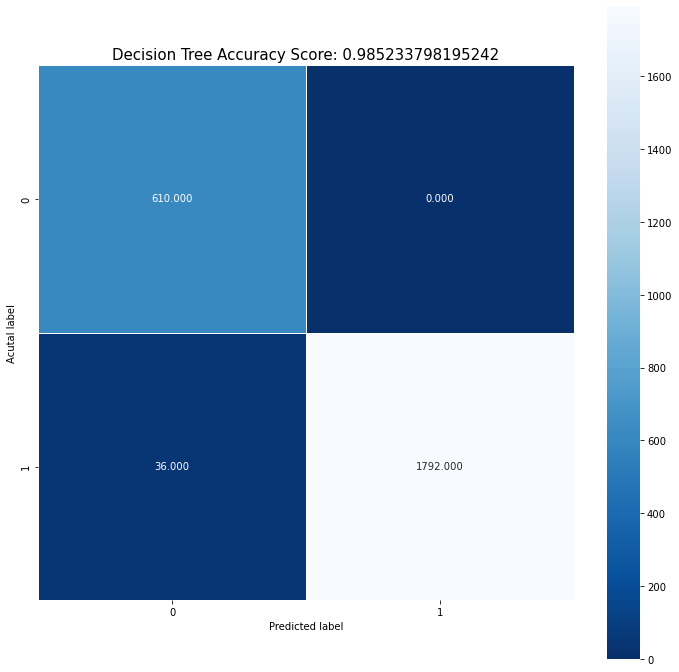

In [13]:
# Biểu diễn lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Acutal label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size=15)

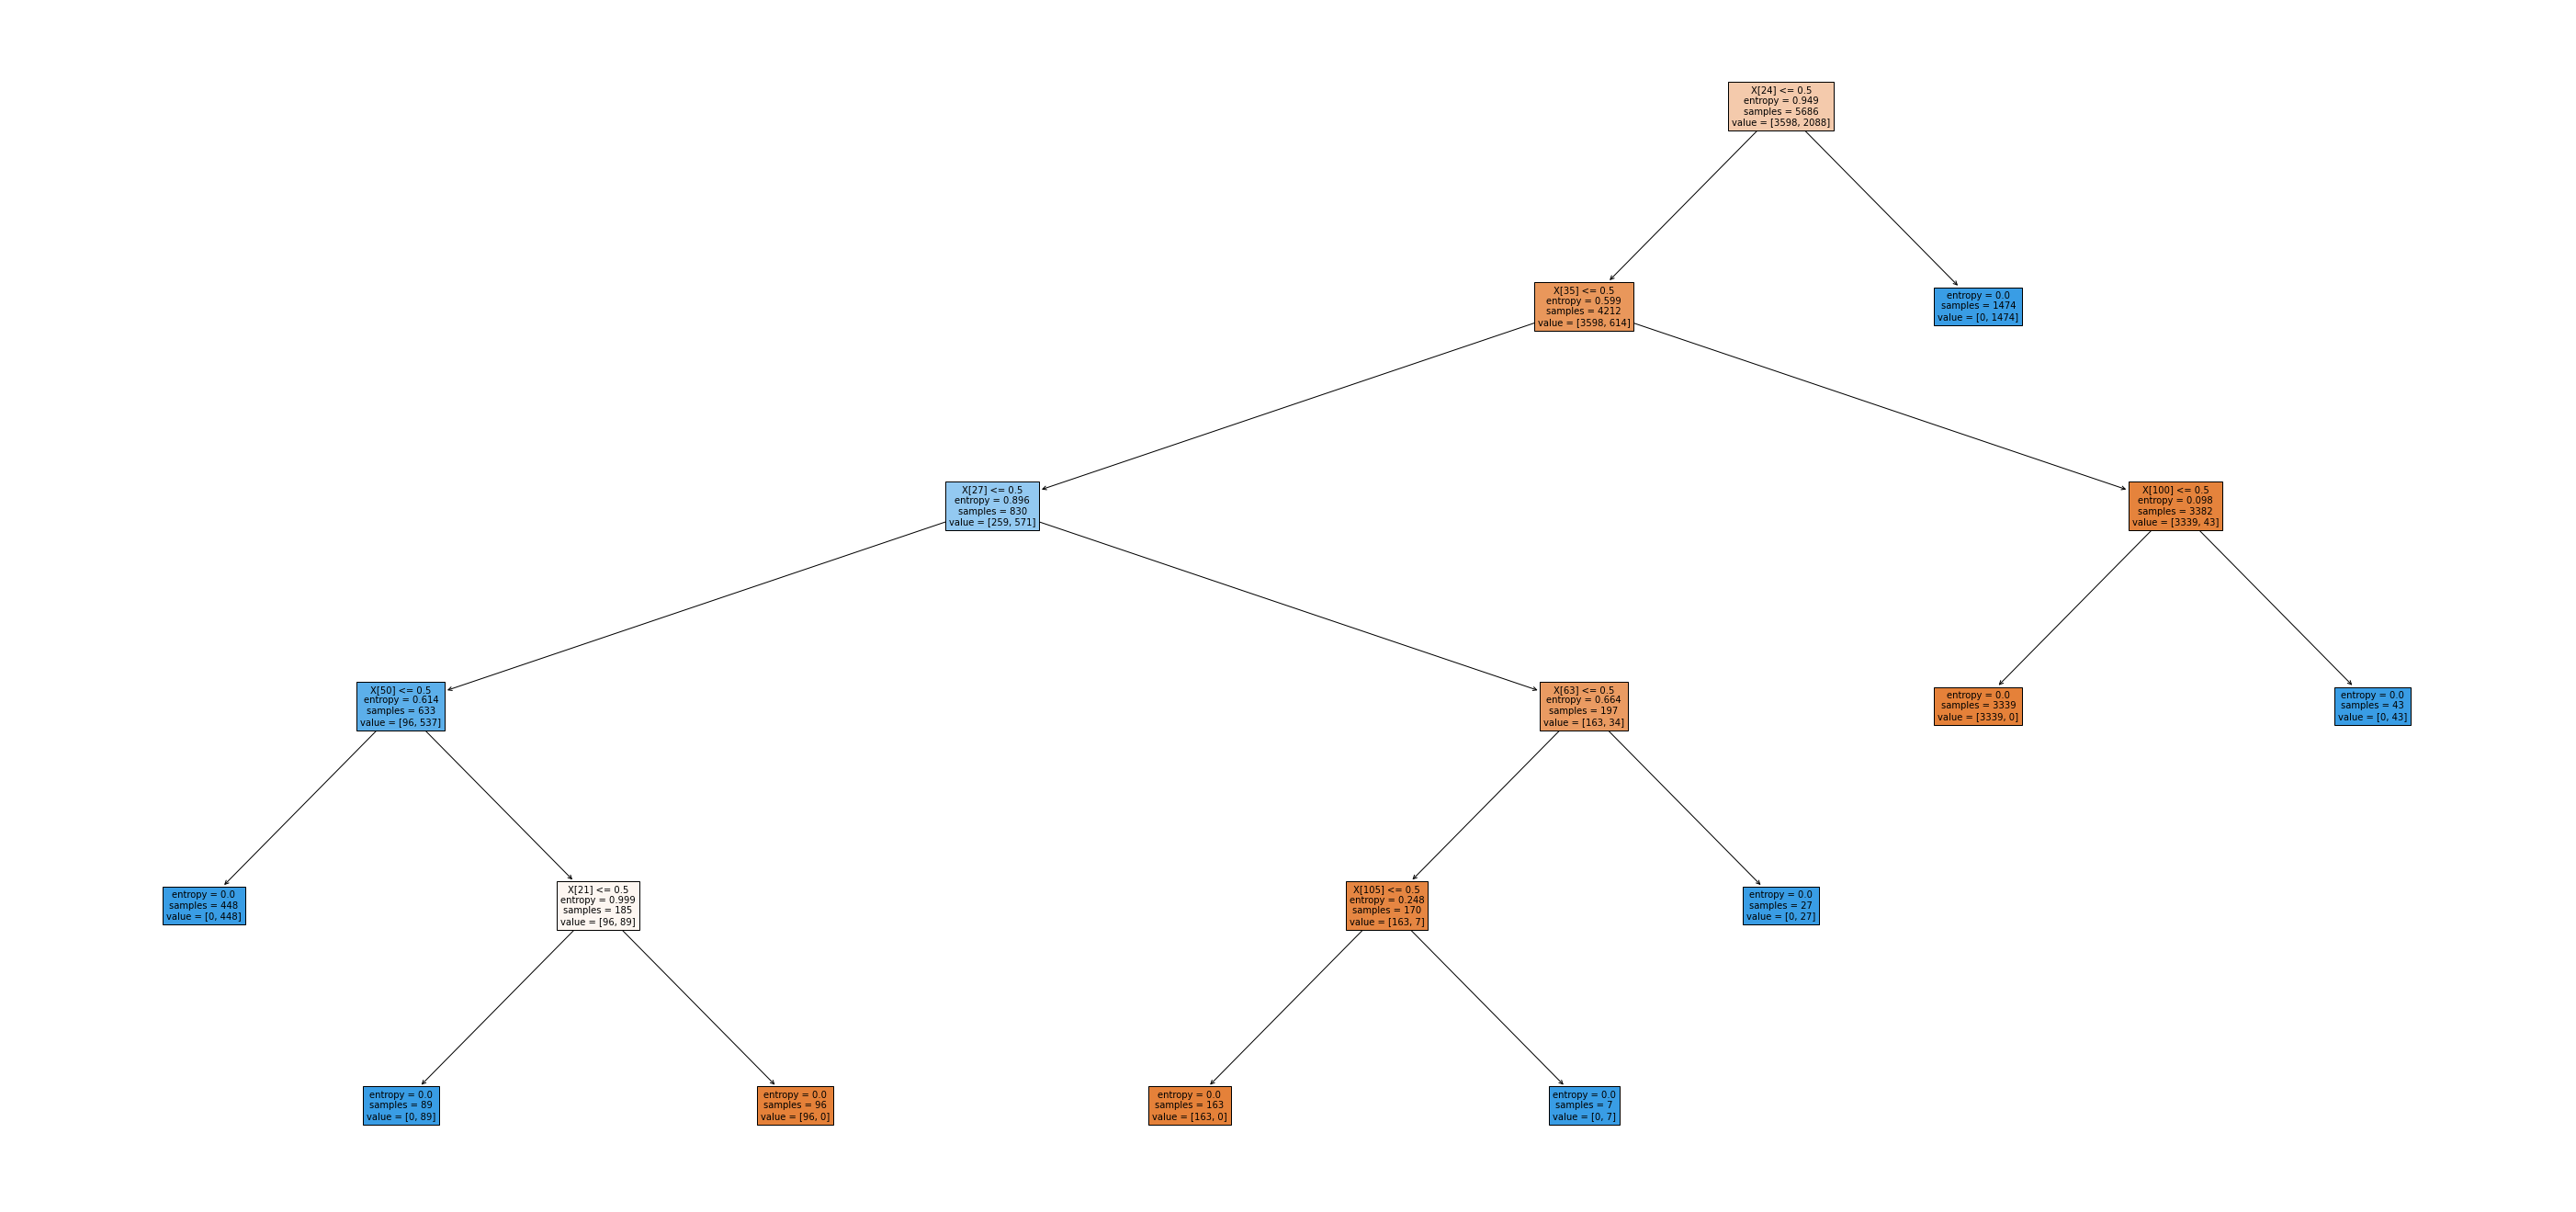

In [14]:
# Cách 2
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree', dpi=100)
plt.show()

In [15]:
# criterion='gini'
clf = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
# Train Decision Tree Classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [16]:
# Predict the response fot test dataset
tree_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

Accuracy: 0.9819524200164069
Report:               precision    recall  f1-score   support

           e       0.93      1.00      0.97       610
           p       1.00      0.98      0.99      1828

    accuracy                           0.98      2438
   macro avg       0.97      0.99      0.98      2438
weighted avg       0.98      0.98      0.98      2438



In [17]:
# Tính toán ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.9819524200164069')

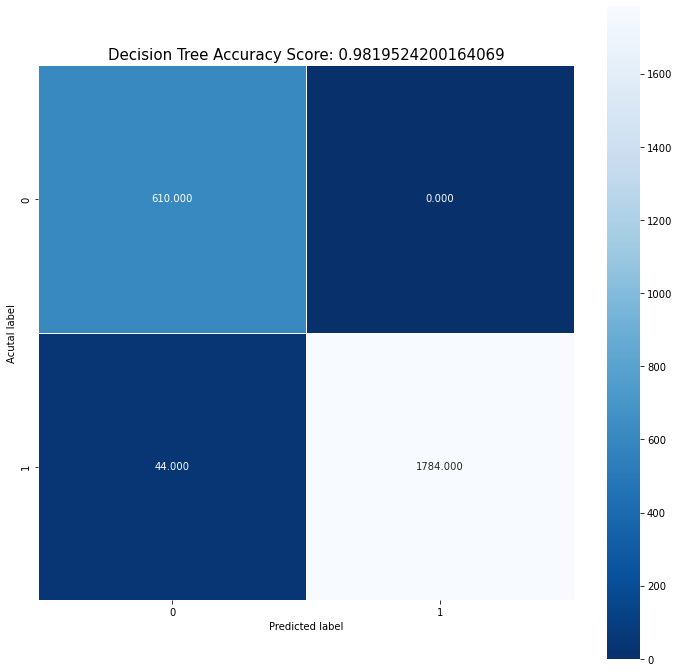

In [18]:
# Biểu diễn lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Acutal label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size=15)

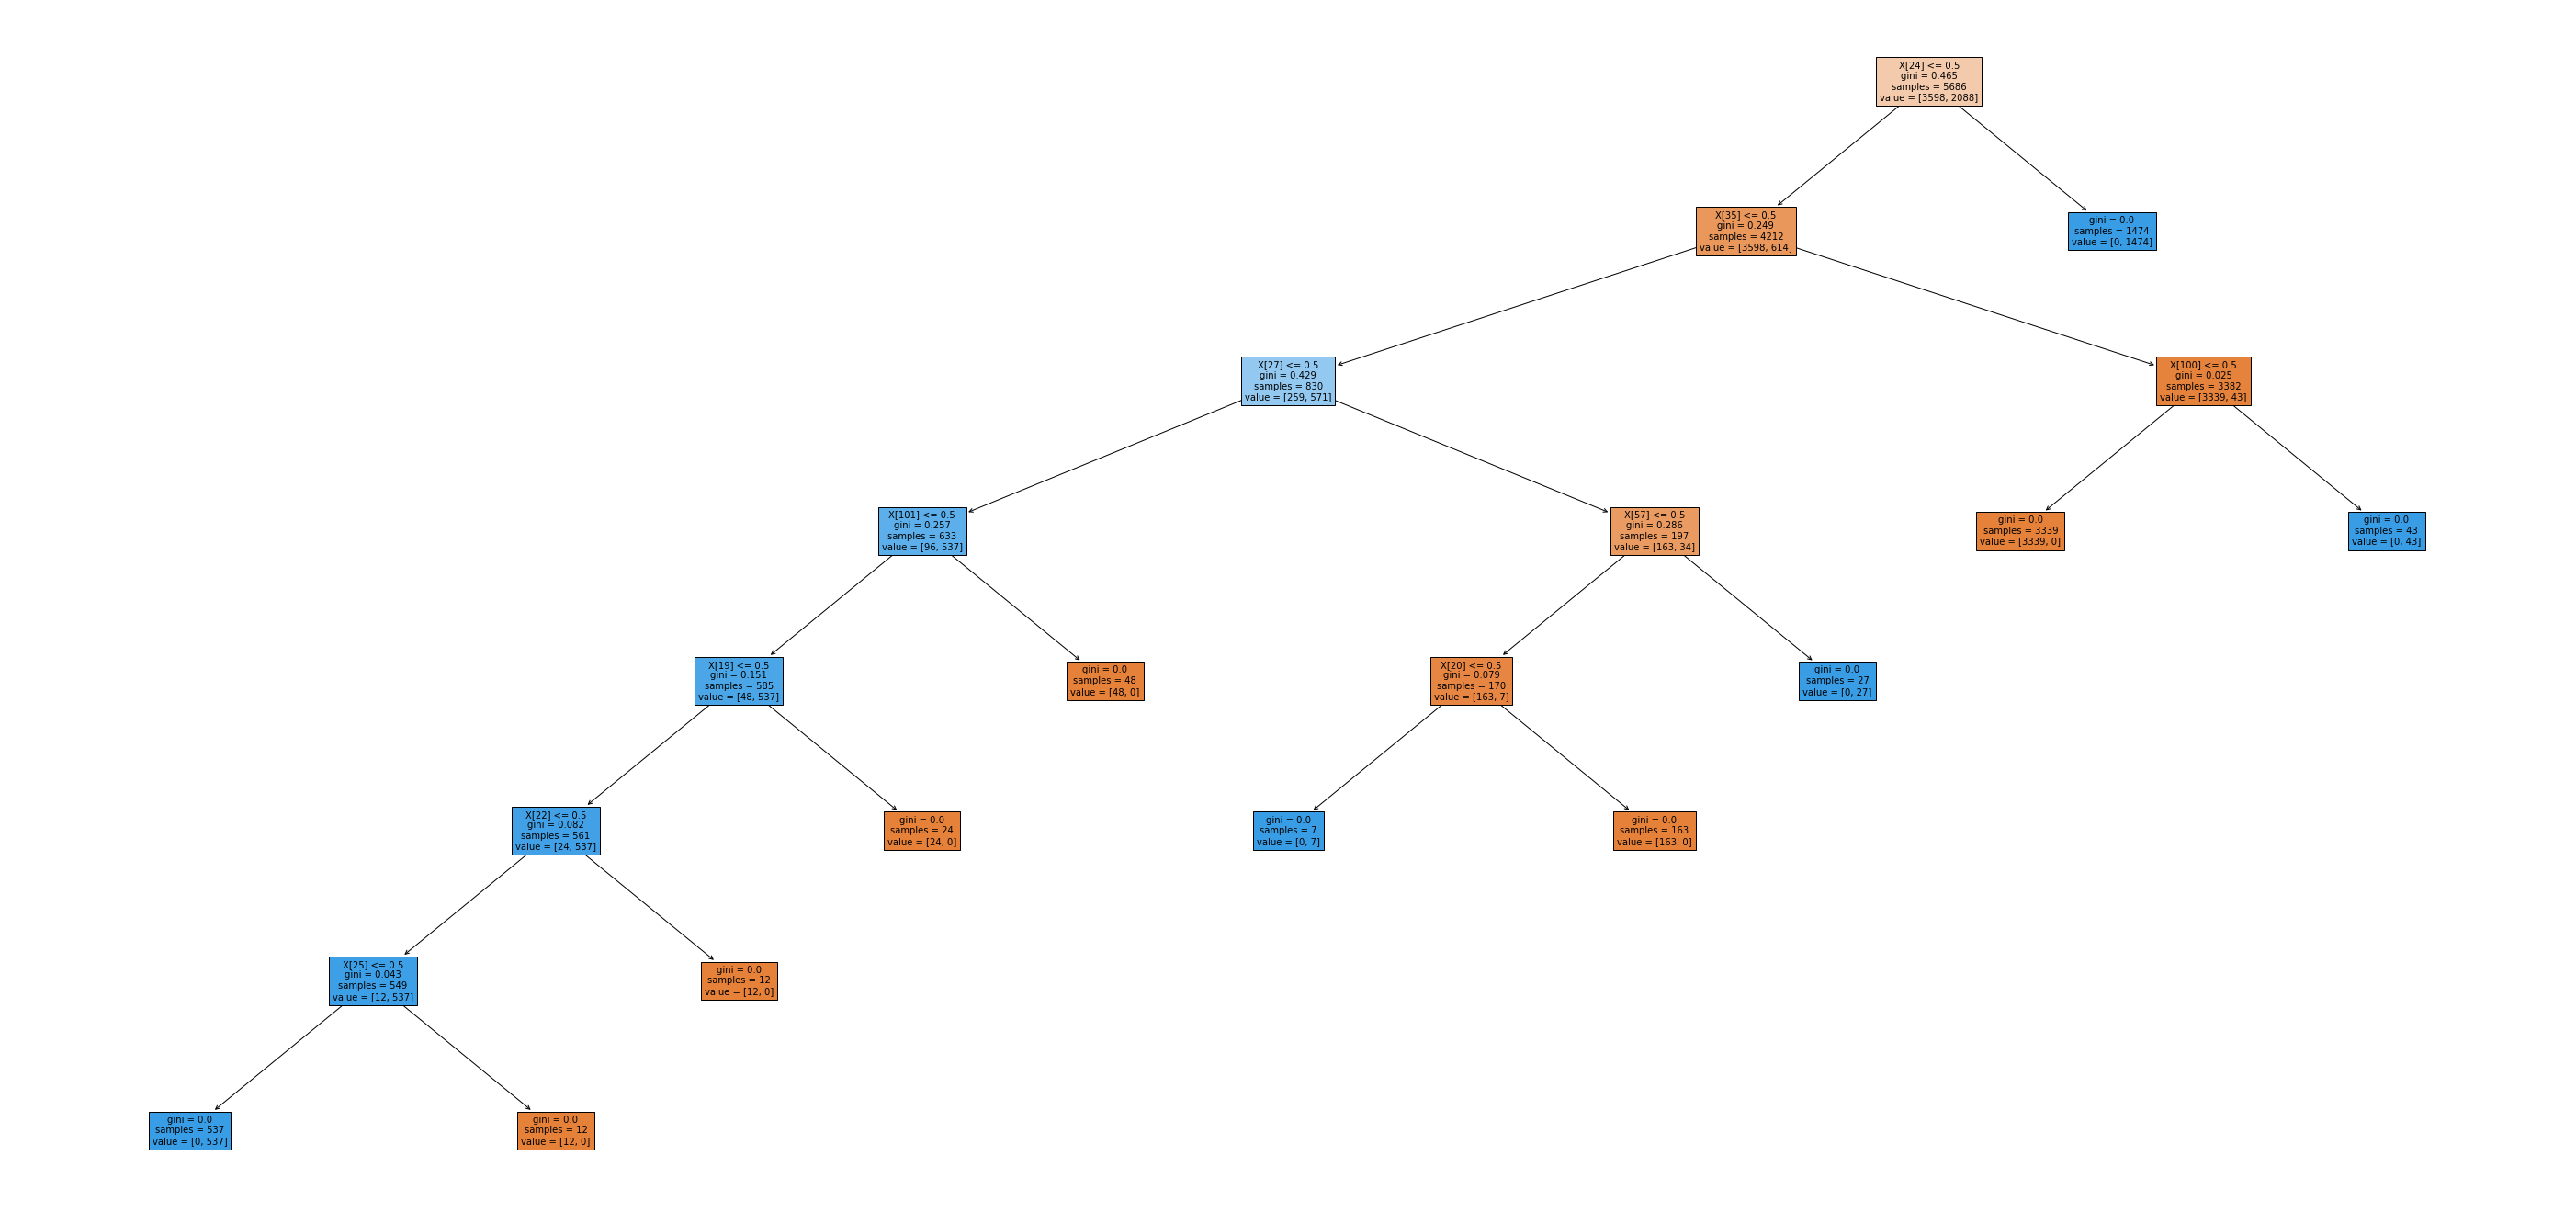

In [19]:
# Cách 2
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree', dpi=100)
plt.show()

In [20]:
#9. XÂY DỰNG MÔ HÌNH PHÂN LỚP BẰNG NAIVE BAYES

In [21]:
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)

In [22]:
# Model Accuracy how often is the classifier correct?
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Accuracy:", bayes_score)
print("Report:", metrics.classification_report(y_test, bayes_pred))

Accuracy: 0.8913043478260869
Report:               precision    recall  f1-score   support

           e       0.90      0.63      0.74       610
           p       0.89      0.98      0.93      1828

    accuracy                           0.89      2438
   macro avg       0.90      0.81      0.84      2438
weighted avg       0.89      0.89      0.88      2438



Text(0.5, 1.0, 'Naive Bayes Accuracy Score: 0.8913043478260869')

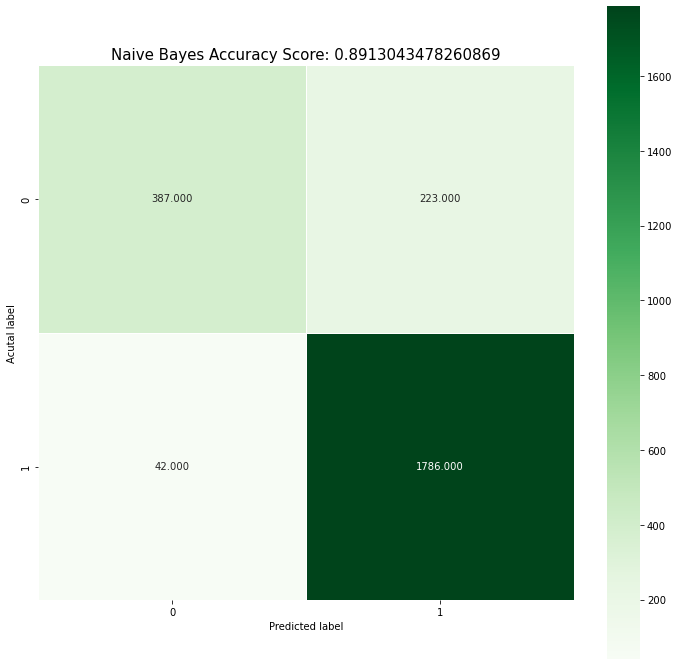

In [23]:
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)

plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Greens');
plt.ylabel('Acutal label');
plt.xlabel('Predicted label');
title = 'Naive Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title, size=15)